# ROI-based decoding accuracies from BOLD activity in contralateral S1

In [6]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import adjust_box_widths
from matplotlib.patches import PathPatch

In [7]:
def read_csv_content(filename):
    data = []
    with open(filename) as file:
        file_reader = csv.reader(file)
        header = next(file_reader)
        for line in file_reader:
            data.append(['Congruent',float(line[0])])
            data.append(['Incongruent',float(line[1])])
            data.append(['Uninformative',float(line[2])])
    return data

def significance(tick_value, data_ratio, max_value, text='***',offset=0.13):
    hanbun_min = tick_value - data_ratio/2
    hanbun_max = tick_value + data_ratio/2
    plt.text(tick_value,max_value+offset-0.02,text,bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
          ha='center', va='center')
    plt.plot([hanbun_min,hanbun_max],[max_value+offset-0.03,max_value+offset-0.03],'k',linewidth=1)
    plt.plot([hanbun_min,hanbun_min],[max_value+offset-0.03,max_value+offset-0.04],'k',linewidth=1)
    plt.plot([hanbun_max,hanbun_max],[max_value+offset-0.03,max_value+offset-0.04],'k',linewidth=1)
    
def draw_line(y1,y2,y3,x1=0,x2=1,x3=2):
    plt.plot([x1,x2,x3],[y1,y2,y3],color='lightgrey',ls='-',linewidth=0.7)

In [8]:
data_list = read_csv_content("ROIaccS1.csv")
data = pd.DataFrame(data_list,columns=["type","value"])

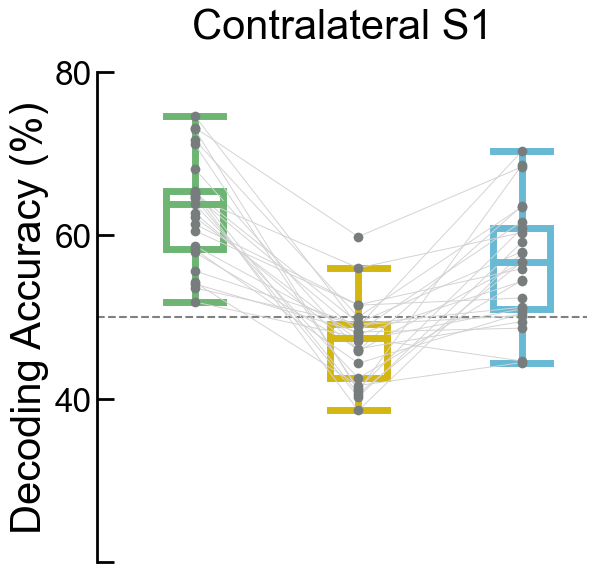

In [14]:
#6eb574
colors_box = ["#03818A", "#D4B611", "#68b9d4"]
colors_box = ["#6eb574", "#D4B611", "#68b9d4"]

colors =  ["#777d7d", "#777d7d", "#777d7d"]

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'mediumblue','alpha': 1},
    'medianprops':{'color':'cornflowerblue','alpha': 1},
    'whiskerprops':{'color':'cornflowerblue','alpha': 1},
    'capprops':{'color':'cornflowerblue','alpha': 1}
}

boxplot = sns.boxplot(
    data=data,
    x='type',
    y='value',
    fliersize=0,
    palette=colors_box,
    width=0.7,
    linewidth=5,
    **PROPS
)

#Boxplot style

box_patches = [patch for patch in boxplot.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = boxplot.artists
    
num_patches = len(box_patches)
lines_per_boxplot = len(boxplot.lines) // num_patches

for i, patch in enumerate(box_patches):
    
    col = colors_box[i%3]
    patch.set_edgecolor(col)
    patch.set_facecolor('None')
    
    for line in boxplot.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        
        
#Boxplot style


ax = sns.stripplot(
    data=data,
    x='type',
    y='value',
    jitter=0,
    color=colors[0],
    size=7,
    dodge=True,
)
plt.axhline(0.5,linewidth=1.5, color='grey',ls='--')



for i in range(0,int(len(data_list)/3)):
    draw_line(data_list[i*3][1],data_list[i*3+1][1],data_list[i*3+2][1])



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(2)

plt.yticks(np.arange(0.3,1.01,step=0.1),np.arange(30,101,step=10))

ax.set_ylabel("Decoding Accuracy (%)",fontsize=30,fontname='Arial')

ax.set_ylim([0.3,0.8])
ax.set_yticks([0.2,0.4,0.6,0.8], fontname='Arial')
ax.set_yticklabels(['','40','60','80'],fontname='Arial')


ax.set_xlabel("",fontsize=15)
ax.set_xlim([-0.6,2.4])

plt.title("Contralateral S1",fontsize=30, fontname='Arial', y =1.05)

ax.set_xticklabels(['Congruent','Incongruent', 'Uninformative'], fontsize=18,fontname='Arial')
ax.set_xticklabels(['','', ''], fontsize=18, fontname='Arial')

ax.tick_params(axis='y', which='major', direction='in',length=12, labelsize=24, width=2)

fig = ax.get_figure()

adjust_box_widths(fig, 0.5)

plt.tight_layout()
plt.tick_params(bottom = False)
fig.tight_layout()
fig.set_size_inches([6,6])

fig.savefig("Fig3A_Contra.jpg",dpi=600)
plt.savefig('Fig3A_Contra.eps', format='eps',dpi=600)